In [77]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 30)

set.seed(8205)

 # Reading in Heart Disease Data

In [78]:

#download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data",
            #  destfile = "./switzerland_data.data")

#read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data/processed.switzerland.data")

cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE) |>
    rename(age      = X1,      # Age in years
           sex      = X2,      # Sex (1 = male, 0 = female)
           cp       = X3,      # Chest pain type 
                               # - 1 : typical angina
                               # - 2 : atypical angina
                               # - 3 : non-anginal pain
                               # - 4 : asymptomatic
           trestbps = X4,      # Resting blood pressure (mmHg)
           chol     = X5,      # Serum cholestoral (mg/dL)
           fbs      = X6,      # Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)
           restecg  = X7,      # Resting electrocardiographic results 
                               # - 0 : normal,
                               # - 1 : having ST-T wave abnormality (T wave inversions and/or ST 
                               #       elevation or depression of > 0.05 mV)
                               # - 2 : showing probable or definite left ventricular hypertrophy by Estes' criteria
           thalach  = X8,      # Maximum heart rate achieved
           exang    = X9,      # Exercise induced angina (0 = no, 1 = yes)
           oldpeak  = X10,     # ST depression induced by exercise relative to rest
           slope    = X11,     # The slope of the peak exercise ST segment
                               # - 1 : upsloping
                               # - 2 : flat
                               # - 3 : downsloping
           ca       = X12,     # Number of major vessels (0-3) colored by flourosopy
           thal     = X13,     # 3 = normal; 6 = fixed defect; 7 = reversable defect
           num      = X14)     # diagnosis of heart disease (angiographic disease status)

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


# Data wrangling

In [79]:
cleveland_data <- cleveland_data |>
    mutate(age      = as.integer(age),
           sex      = as.factor(sex),
           cp       = as.factor(cp),
           trestbps = as.integer(trestbps),
           chol     = as.integer(chol),
           fbs      = as.factor(fbs),
           restecg  = as.factor(restecg),
           thalach  = as.integer(thalach),
           exang    = as.factor(exang),
           oldpeak  = as.double(oldpeak),
           slope    = as.factor(slope),
           ca       = as.integer(ca),
           thal     = as.factor(thal),
           num      = as.factor(num))

cleveland_data

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<int>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1,7.0,2


In [80]:
# Splitting the data into training and testing sets
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = num)
cleveland_training <- training(cleveland_split) 
cleveland_testing <- testing(cleveland_split)

# Exploratory data analysis

### Heart Disease Summary

In [81]:
target_summary <- cleveland_training |>
    group_by(num) |>
    summarize(count = n())
target_summary

num,count
<fct>,<int>
0,123
1,42
2,26
3,27
4,8


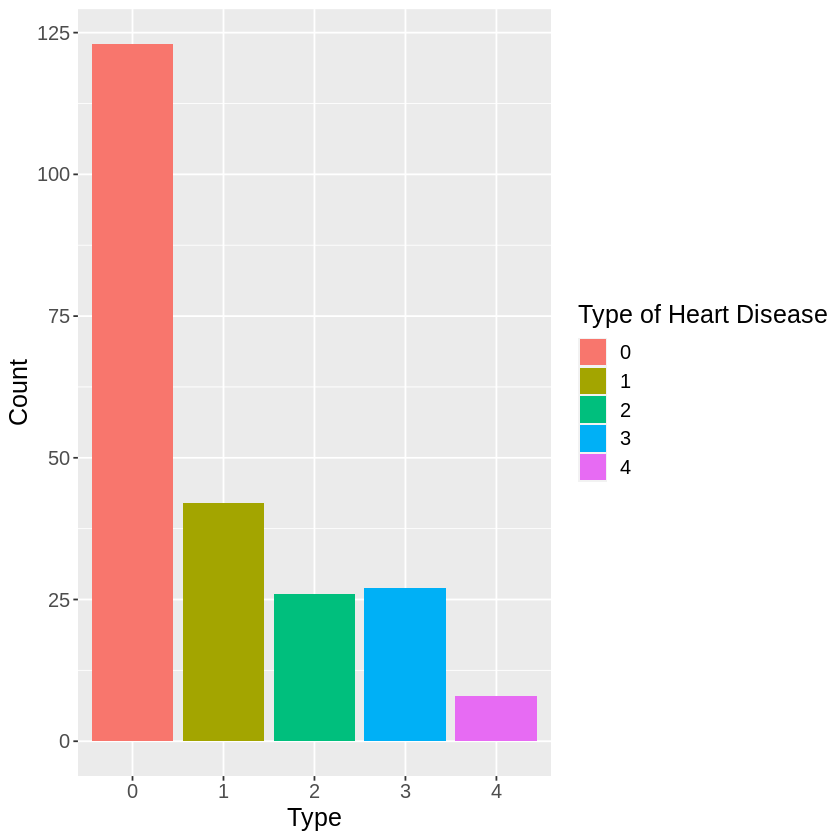

In [82]:
target_summary_plot <- target_summary |>
    ggplot(aes(x =  num, y = count, fill = num)) +
    geom_bar(stat = "identity") +
    labs(x = "Type", y = "Count", fill = "Type of Heart Disease") +
    theme(text = element_text(size = 15))

target_summary_plot

From the dataset, the majority of patients do not have any presence of heart disease. For those who have presence of a heart disease, most have **Type 1** whereas **Type 4** is the least common.

### Demographics

In [83]:
demographic_summary <- cleveland_training |>
    group_by(sex) |>
    summarize(count = n(), average_age = mean(age))
demographic_summary

sex,count,average_age
<fct>,<int>,<dbl>
0,73,56.06849
1,153,53.66667


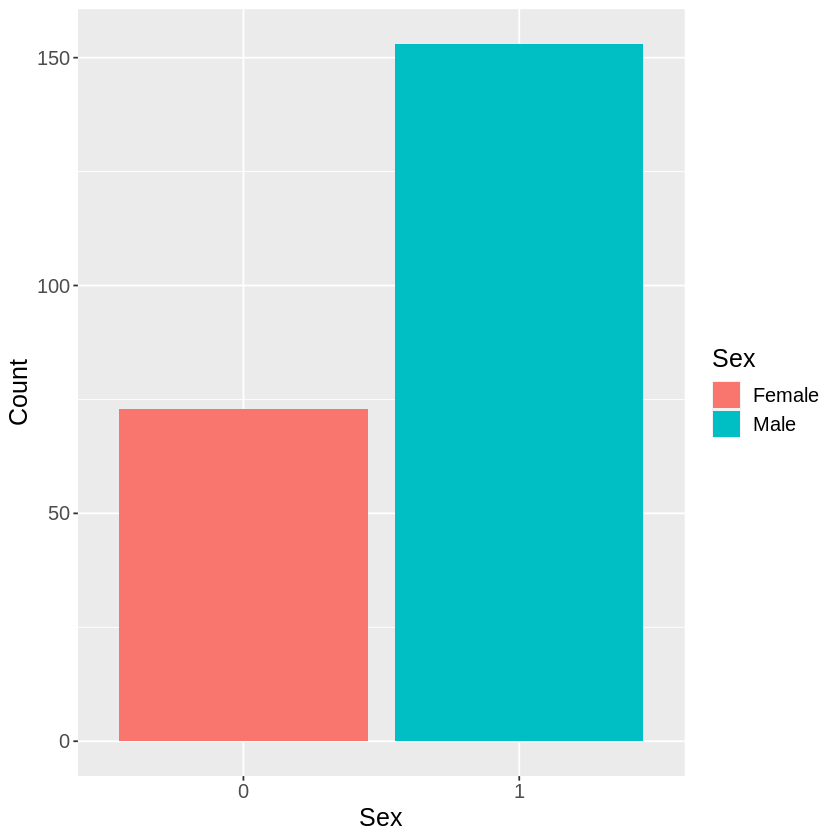

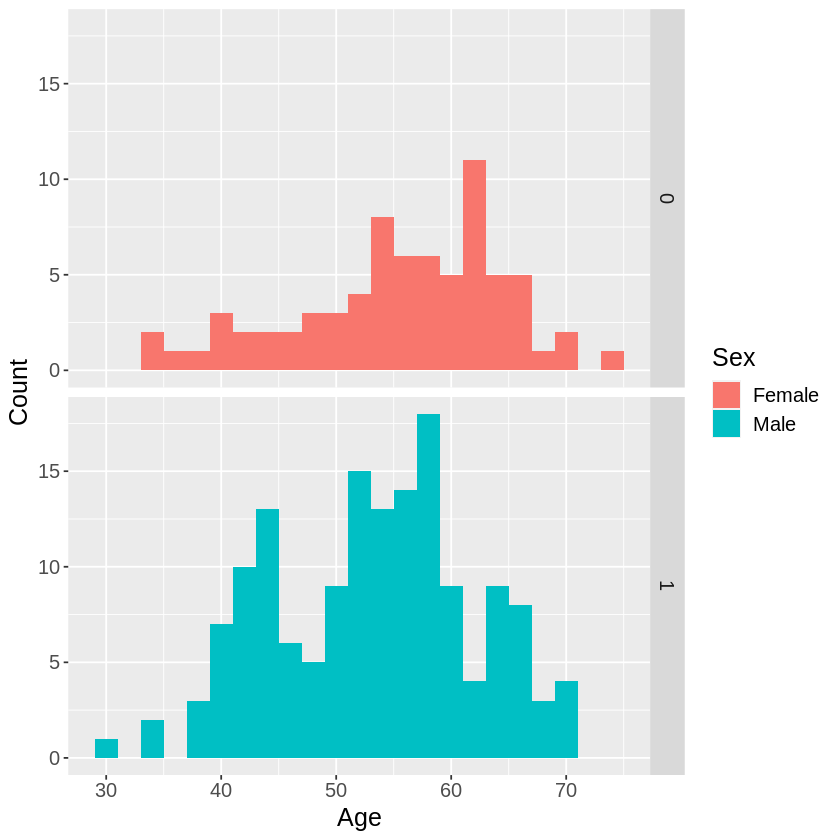

In [84]:
demographic_sex_summary_plot <- demographic_summary |>
    ggplot(aes(x =  sex, y = count, fill = sex)) +
    geom_bar(stat = "identity") +
    labs(x = "Sex", y = "Count", fill = "Sex") +
    scale_fill_discrete(labels = c("Female", "Male")) +
    theme(text = element_text(size = 15))

demographic_age_summary_plot <- cleveland_training |>
    ggplot(aes(x =  age, fill = sex)) +
    geom_histogram(binwidth = 2) +
    labs(x = "Age", y =  "Count", fill = "Sex") +
    scale_fill_discrete(labels = c("Female", "Male")) +
    facet_grid(rows = vars(sex)) +
    theme(text = element_text(size = 15))

demographic_sex_summary_plot
demographic_age_summary_plot

The number of male double that of female participants. The average age for this dataset is around 54 years old. In addition, the average age of the male is slightly younger than female participants.

### Blood Pressure

In [85]:
average_restbps <- cleveland_training |>
    summarize(average_restbps = mean(trestbps))
average_restbps

average_restbps
<dbl>
132.3319


The average resting blood pressure of all participants is 132*mmHg*. Let's see how this would affect the type of heart disease.

In [86]:
average_restbps_by_type <- cleveland_training |>
    group_by(num) |>
    summarize(average_restbps = mean(trestbps))
average_restbps_by_type

num,average_restbps
<fct>,<dbl>
0,128.8293
1,135.7143
2,136.2692
3,136.5926
4,141.2500


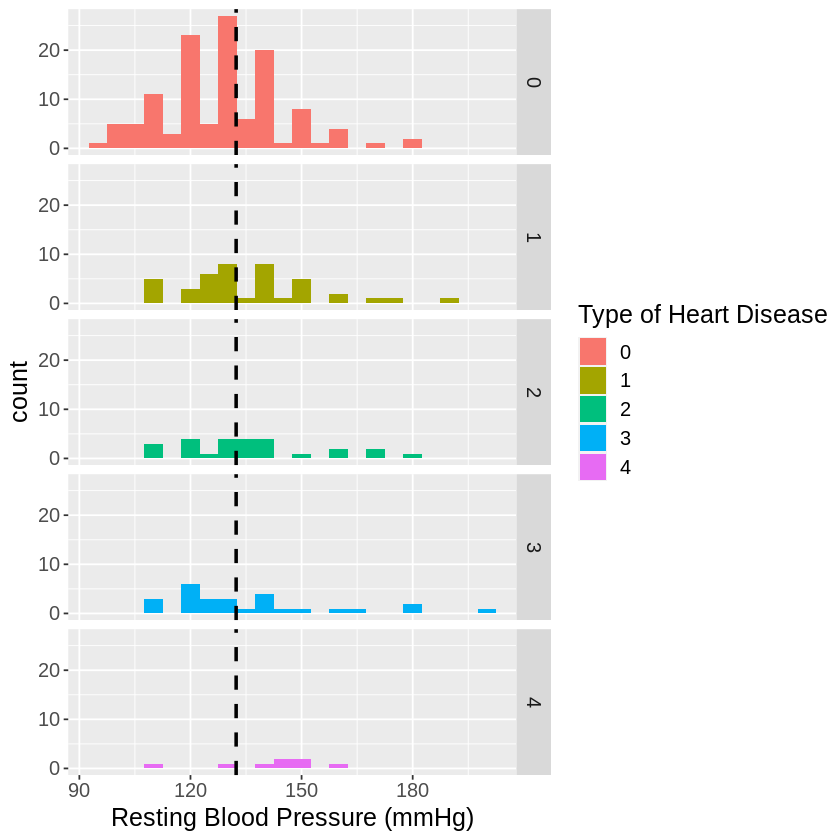

In [87]:
restbps_summary_plot <- cleveland_training |>
    ggplot(aes(x = trestbps, fill = num)) +
    geom_histogram(binwidth = 5) +
    geom_vline(xintercept = 132.33, linetype = "dashed", size = 1.0) +
    labs(x = "Resting Blood Pressure (mmHg)", fill = "Type of Heart Disease") +
    facet_grid(rows = vars(num)) +
    theme(text = element_text(size = 15))

restbps_summary_plot

People with no presence of heart disease have lower average resting blood pressure. Those who do tend to have slightly higher resting blood pressure with worse cases of heart disease.

### Serum Cholestoral

In [88]:
average_chol <- cleveland_training |>
    summarize(average_chol = mean(chol))
average_chol

average_chol
<dbl>
248.5


The average serum cholestoral in the data set is 248.5*mg/dL*. Let's see what's the average for each type of heart disease.

In [89]:
average_chol_by_type <- cleveland_training |>
    group_by(num) |>
    summarize(average_chol = mean(chol))
average_chol_by_type

num,average_chol
<fct>,<dbl>
0,247.1220
1,249.5952
2,255.7692
3,248.3333
4,240.8750


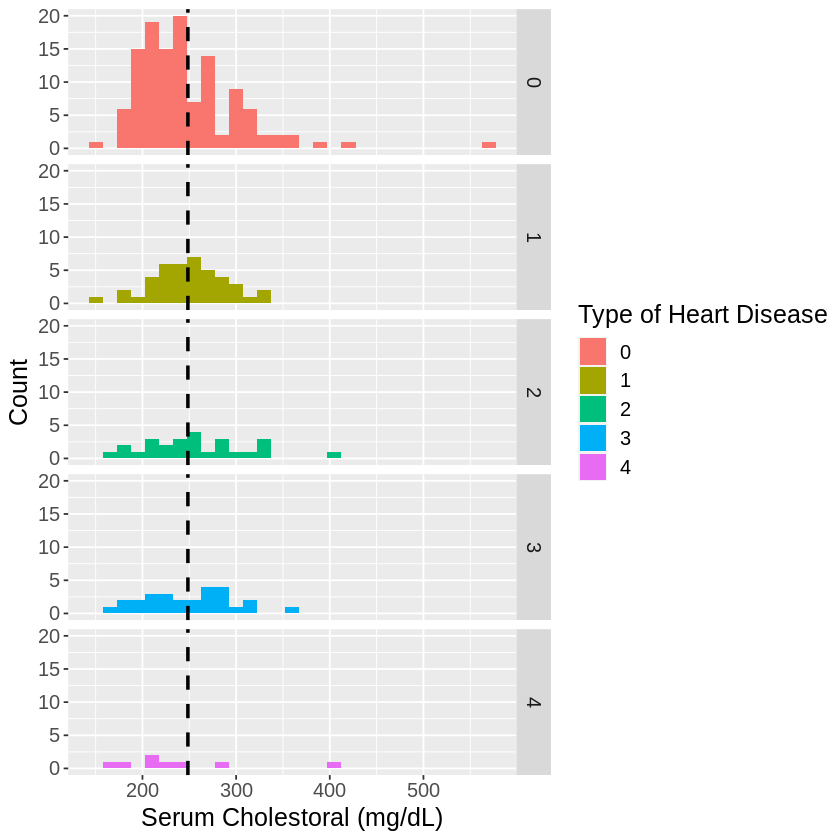

In [90]:
chol_summary_plot <- cleveland_training |>
    ggplot(aes(x = chol, fill = num)) +
    geom_histogram(binwidth = 15) +
    geom_vline(xintercept = 248.5, linetype = "dashed", size = 1.0) +
    labs(x = "Serum Cholestoral (mg/dL)", y = "Count", fill = "Type of Heart Disease") +
    facet_grid(rows = vars(num)) +
    theme(text = element_text(size = 15))

chol_summary_plot

### Fasting Blood Sugar

In [91]:
#pull the number of instances of each type of heart disease
disease_count <- c(123, 42, 26, 27, 8)

fbs_summary <- cleveland_training |>
    group_by(num, fbs) |>
    summarize(count = n()) 

fbs_lower_than_proportion <- fbs_summary |>
    filter(fbs == 0) |> 
    bind_cols(type_count = disease_count) |>
    mutate(lower_than_proportion = count / type_count) |>
    select(num, lower_than_proportion)

fbs_summary
fbs_lower_than_proportion

`summarise()` has grouped output by 'num'. You can override using the `.groups`
argument.


num,fbs,count
<fct>,<fct>,<int>
0,0,107
0,1,16
1,0,38
1,1,4
2,0,21
2,1,5
3,0,21
3,1,6
4,0,8


num,lower_than_proportion
<fct>,<dbl>
0,0.8699187
1,0.9047619
2,0.8076923
3,0.7777778
4,1.0000000


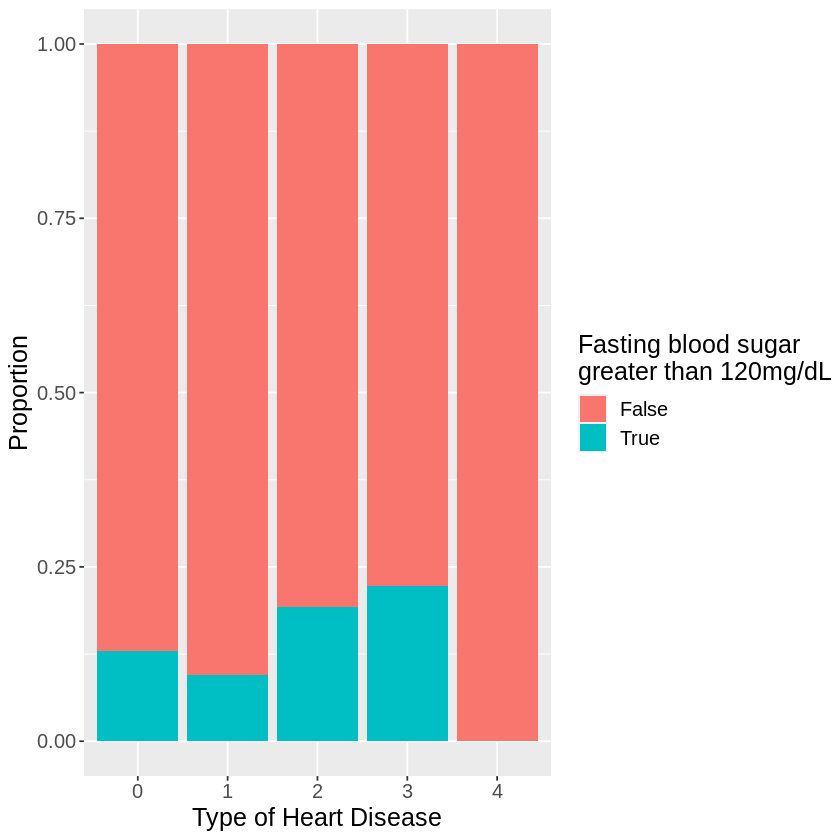

In [92]:
fbs_summary_plot <- cleveland_training |>
    ggplot(aes(x = num, fill = fbs)) +
    geom_bar(position = "fill") +
    labs(x = "Type of Heart Disease", y = "Proportion", fill = "Fasting blood sugar \ngreater than 120mg/dL") +
    scale_fill_discrete(labels = c("False", "True")) +
    theme(text = element_text(size = 15))
fbs_summary_plot

### Resting electrocardiographic

In [93]:
restecg_summary <- cleveland_training |>
    group_by(num, restecg) |>
    summarize(count = n()) |>
    filter(restecg == 0) |> 
    bind_cols(type_count = disease_count) |>
    mutate(normal_proportion = count / type_count) |>
    select(num, normal_proportion)
restecg_summary

`summarise()` has grouped output by 'num'. You can override using the `.groups`
argument.


num,normal_proportion
<fct>,<dbl>
0,0.5934959
1,0.4285714
2,0.5384615
3,0.3703704
4,0.1250000


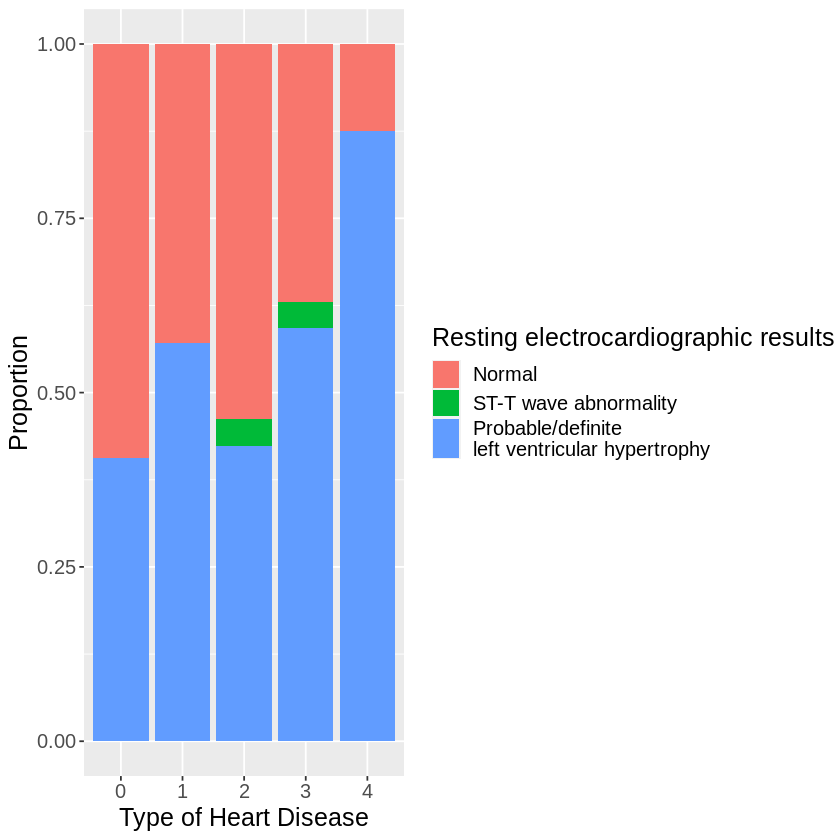

In [94]:
restecg_summary_plot <- cleveland_training |>
    ggplot(aes(x = num, fill = restecg)) +
    geom_bar(position = "fill") +
    labs(x = "Type of Heart Disease", y = "Proportion", fill = "Resting electrocardiographic results") +
    scale_fill_discrete(labels = c("Normal", "ST-T wave abnormality", "Probable/definite \nleft ventricular hypertrophy")) +
    theme(text = element_text(size = 15))
restecg_summary_plot

### Maximum Heart Rate

In [95]:
average_thalach <- cleveland_training |>
    summarize(average_thalach = mean(thalach))
average_thalach

average_thalach
<dbl>
149.4867


In [96]:
average_thalach_by_type <- cleveland_training |>
    group_by(num) |>
    summarize(average_thalach = mean(thalach))
average_thalach_by_type

num,average_thalach
<fct>,<dbl>
0,158.4309
1,147.9762
2,131.9231
3,131.3333
4,138.2500


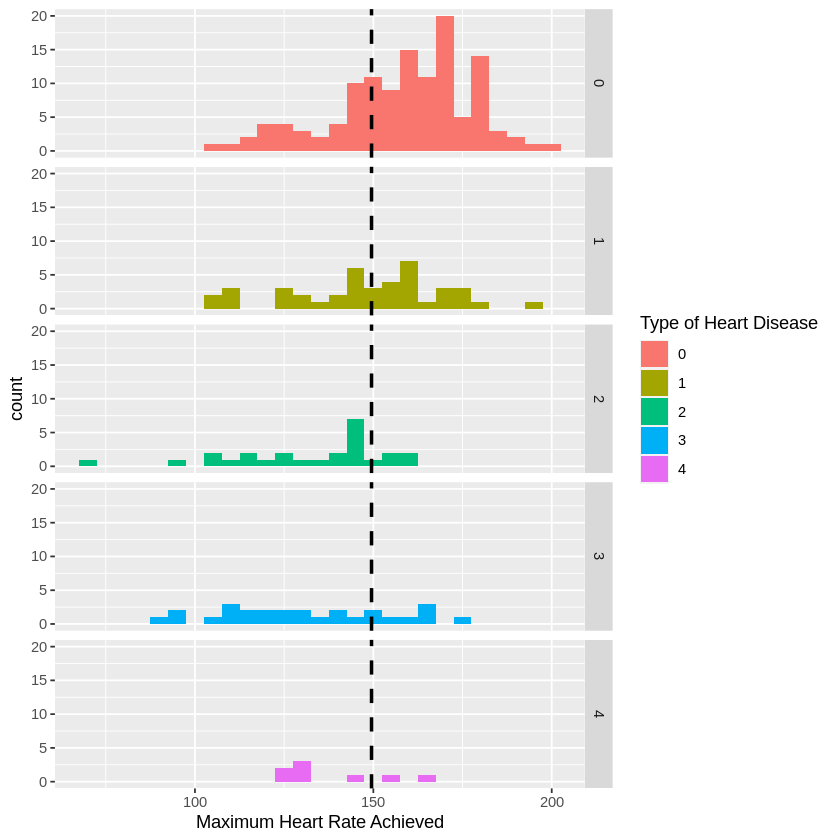

In [97]:
thalach_summary_plot <- cleveland_training |>
    ggplot(aes(x = thalach, fill = num)) +
    geom_histogram(binwidth = 5) +
    geom_vline(xintercept = 149.5, linetype = "dashed", size = 1.0) +
    facet_grid(rows = vars(num)) +
    labs(x = "Maximum Heart Rate Achieved", fill = "Type of Heart Disease")

thalach_summary_plot

### Exercise Induced Angina

In [98]:
exang_summary <- cleveland_training |>
    group_by(num, exang) |>
    summarize(count = n()) 

exang_proportion <- exang_summary |>
    filter(exang == 0) |> 
    bind_cols(type_count = disease_count) |>
    mutate(exang_proportion = count / type_count) |>
    select(num, exang_proportion)

exang_summary
exang_proportion

`summarise()` has grouped output by 'num'. You can override using the `.groups`
argument.


num,exang,count
<fct>,<fct>,<int>
0,0,103
0,1,20
1,0,25
1,1,17
2,0,11
2,1,15
3,0,10
3,1,17
4,0,4


num,exang_proportion
<fct>,<dbl>
0,0.8373984
1,0.5952381
2,0.4230769
3,0.3703704
4,0.5000000


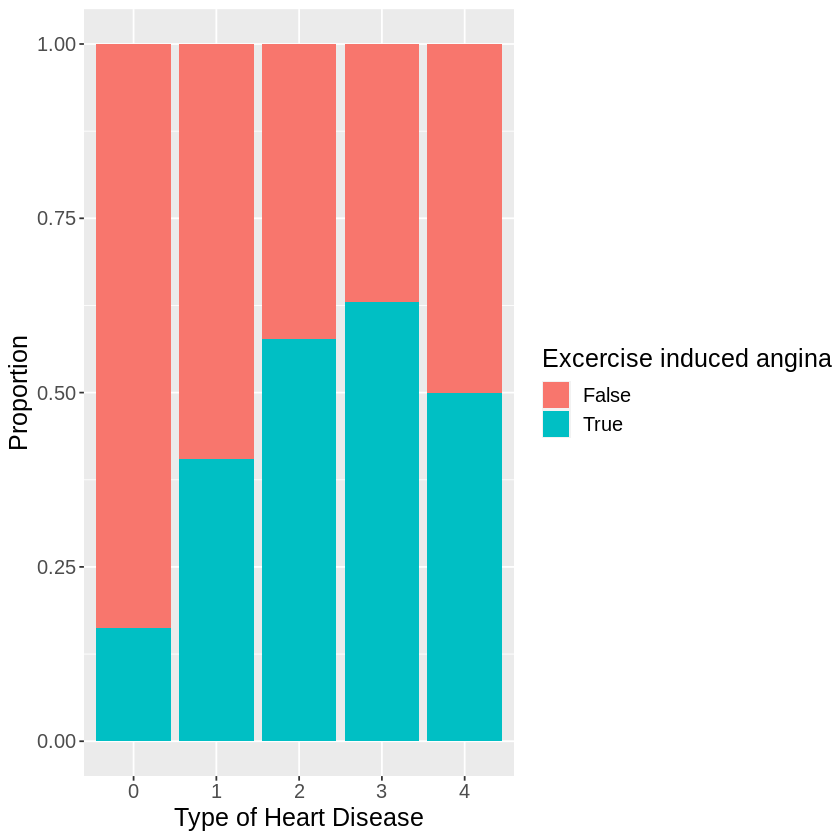

In [99]:
exang_summary_plot <- cleveland_training |>
    ggplot(aes(x = num, fill = exang)) +
    geom_bar(position = "fill") +
    labs(x = "Type of Heart Disease", y = "Proportion", fill = "Excercise induced angina") +
    scale_fill_discrete(labels = c("False", "True")) +
    theme(text = element_text(size = 15))
exang_summary_plot

### ST Depression

In [100]:
average_oldpeak <- cleveland_training |>
    summarize(average_oldpeak = mean(oldpeak))
average_oldpeak

average_oldpeak
<dbl>
1.033186


In [101]:
average_oldpeak_by_type <- cleveland_training |>
    group_by(num) |>
    summarize(average_oldpeak = mean(oldpeak))
average_oldpeak_by_type

num,average_oldpeak
<fct>,<dbl>
0,0.5910569
1,0.9309524
2,1.8230769
3,1.9925926
4,2.5625000


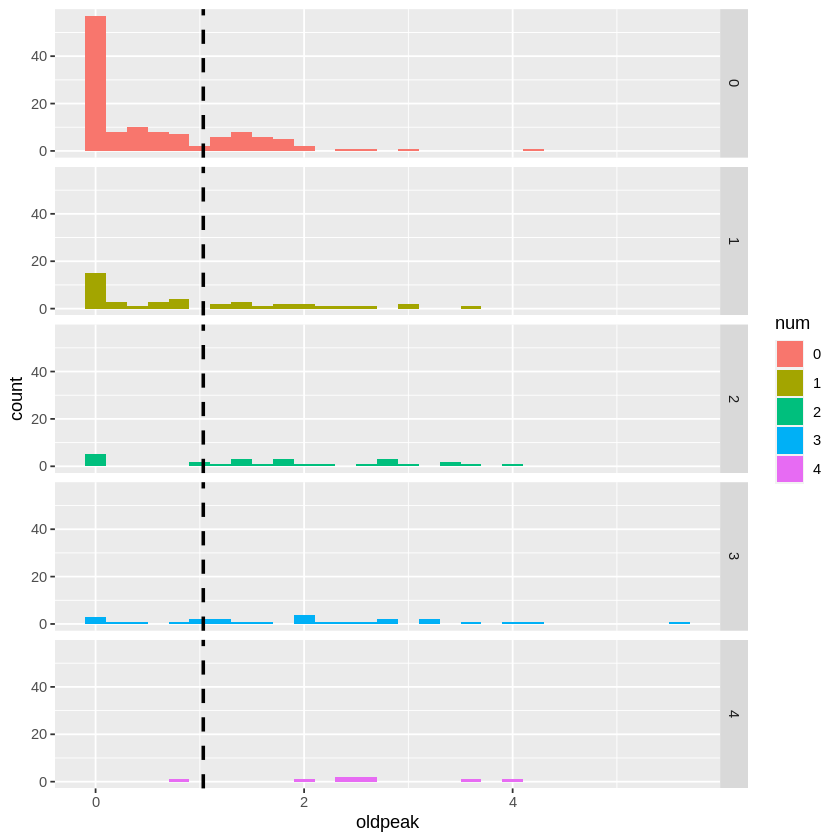

In [102]:
oldpeak_summary_plot <- cleveland_training |>
    ggplot(aes(x = oldpeak, fill = num)) +
    geom_histogram(binwidth = 0.2) +
    geom_vline(xintercept = 1.033, linetype = "dashed", size = 1.0) +
    facet_grid(rows = vars(num))

oldpeak_summary_plot

### Slope of the Peak Exercise ST Segment

In [103]:
slope_summary <- cleveland_training |>
    group_by(num, slope) |>
    summarize(count = n()) 
slope_summary

`summarise()` has grouped output by 'num'. You can override using the `.groups`
argument.


num,slope,count
<fct>,<fct>,<int>
0,1,81
0,2,35
0,3,7
1,1,19
1,2,22
1,3,1
2,1,5
2,2,18
2,3,3


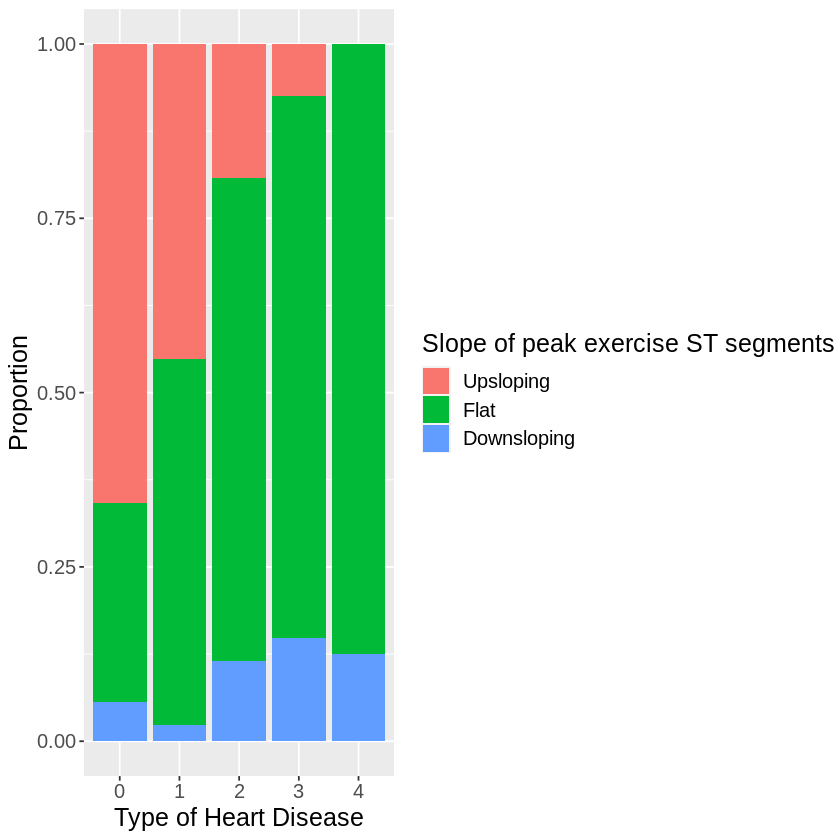

In [104]:
slope_summary_plot <- cleveland_training |>
    ggplot(aes(x = num, fill = slope)) +
    geom_bar(position = "fill") +
    labs(x = "Type of Heart Disease",y = "Proportion", fill = "Slope of peak exercise ST segments") +
    scale_fill_discrete(labels = c("Upsloping", "Flat", "Downsloping")) +
    theme(text = element_text(size = 15))
slope_summary_plot

### Number of major vessels colored by flourosopy

In [105]:
ca_summary <- cleveland_training |>
    filter(!is.na(ca)) |>
    group_by(num, ca) |>
    summarize(count = n()) 

ca_summary

`summarise()` has grouped output by 'num'. You can override using the `.groups`
argument.


num,ca,count
<fct>,<int>,<int>
0,0,95
0,1,16
0,2,6
0,3,3
1,0,20
1,1,14
1,2,5
1,3,2
2,0,7


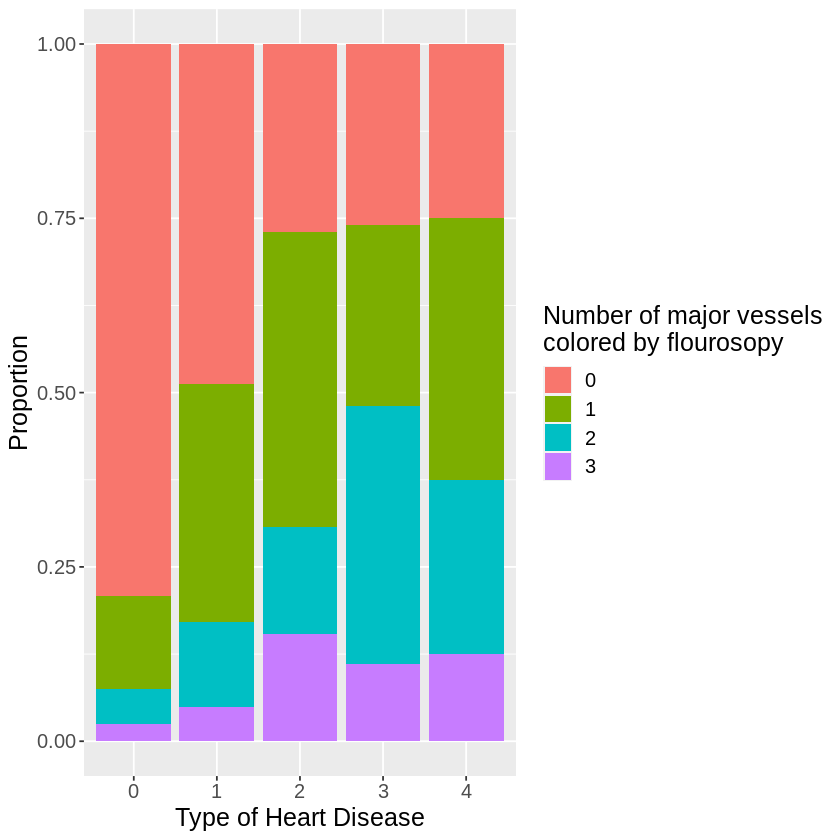

In [106]:
ca_summary_plot <- cleveland_training |>
    filter(!is.na(ca)) |>
    ggplot(aes(x = num, fill = as.factor(ca))) +
    geom_bar(position = "fill") +
    labs(x = "Type of Heart Disease", y = "Proportion",
         fill = "Number of major vessels \ncolored by flourosopy") +
    scale_fill_discrete(labels = c(0, 1, 2, 3)) +
    theme(text = element_text(size = 15))
ca_summary_plot

### Choosing Predictor Variables

In [107]:
heart_disease_subset <- cleveland_training |>
    select(trestbps,
           chol,
           thalach,
           oldpeak,
           num)
names <- colnames(heart_disease_subset |> select(-num))

In [108]:
# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
heart_disease_vfold <- vfold_cv(heart_disease_subset, v = 5, strata = num)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:length(names)) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("num", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_disease_recipe <- recipe(as.formula(model_string), 
                                data = heart_disease_subset) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors()) 

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(heart_disease_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_disease_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ oldpeak,0.5836632
2,num ~ oldpeak+thalach,0.5798037
3,num ~ oldpeak+thalach+trestbps,0.5826036
4,num ~ oldpeak+thalach+trestbps+chol,0.5627119
